In [221]:
%pip install scikit-learn
%pip install kagglehub

In [222]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pickle

In [223]:
df = pd.read_csv("/content/sample_data/cleaned_credit_risk.csv")

df

,person_age,person_income($),person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt($),loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,60.0,PERSONAL,D,23000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,23000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,23000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32571,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32572,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32573,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,23000,10.99,1,0.46,N,28
32574,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [224]:
# defining input and output data
X = df.drop(["loan_status", "loan_grade"] , axis=1)
y = df["loan_status"]

In [225]:
#Converting Categorical Data into numbers for feeding the data into the model
cat_cols = [
    "person_home_ownership",
    "loan_intent",
    "cb_person_default_on_file"
]

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

In [226]:
# spliting the data for training and testing in 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [227]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [228]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [229]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=10 , random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [230]:
lr_pred = lr_model.predict(X_test_scaled)

In [231]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Logistic Regression Metrics
print("--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print(classification_report(y_test, lr_pred))

# 2. Decision Tree Metrics
print("\n--- Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")
print(classification_report(y_test, dt_pred))

--- Logistic Regression Evaluation ---
Accuracy: 0.8382443216697361
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5096
           1       0.72      0.42      0.53      1420

    accuracy                           0.84      6516
   macro avg       0.79      0.69      0.72      6516
weighted avg       0.83      0.84      0.82      6516


--- Decision Tree Evaluation ---
Accuracy: 0.9105279312461633
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5096
           1       0.91      0.66      0.76      1420

    accuracy                           0.91      6516
   macro avg       0.91      0.82      0.85      6516
weighted avg       0.91      0.91      0.91      6516



In [232]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [233]:
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:,1]
dt_pred = dt_model.predict(X_test_scaled)
dt_prob = dt_model.predict_proba(X_test_scaled)[:,1]

In [234]:
print("Logistic Accuracy:", accuracy_score(y_test, lr_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Logistic Accuracy: 0.8382443216697361
Decision Tree Accuracy: 0.9105279312461633


In [235]:
print("Logistic ROC-AUC:", roc_auc_score(y_test, lr_prob))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, dt_prob))

Logistic ROC-AUC: 0.8348156245163287
Decision Tree ROC-AUC: 0.8928578338160833


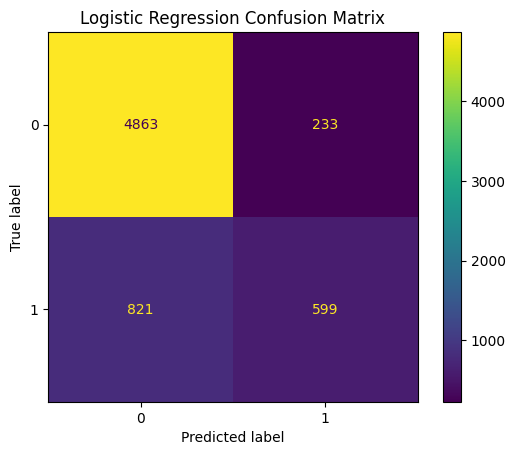

In [236]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

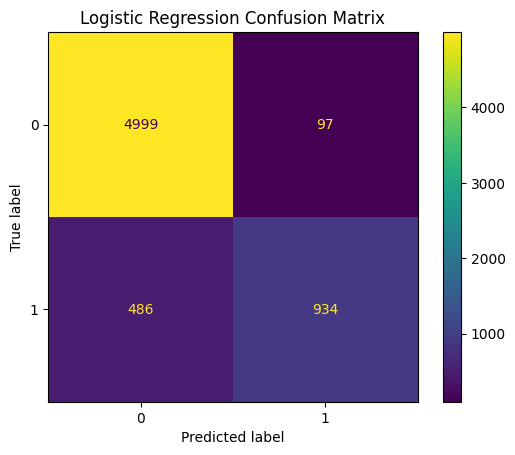

In [237]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

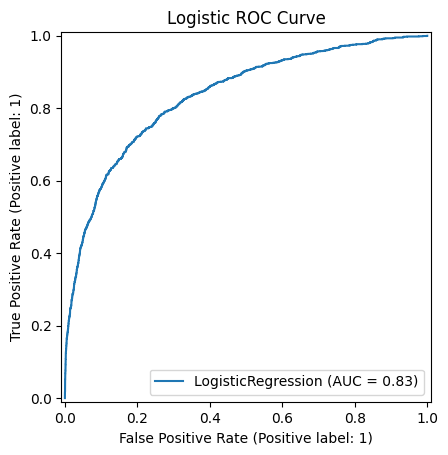

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


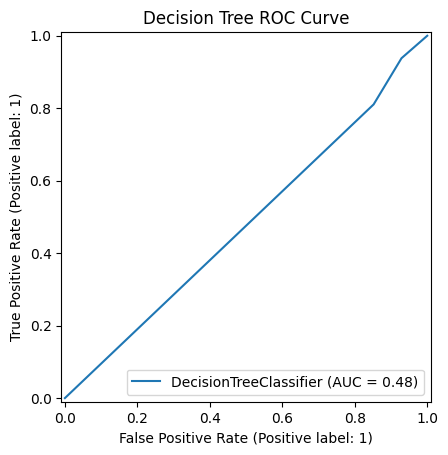

In [238]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.title("Logistic ROC Curve")
plt.show()

RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Decision Tree ROC Curve")
plt.show()

In [239]:
dt_train_accuracy = accuracy_score(y_train, dt_model.predict(X_train_scaled))
dt_test_accuracy = accuracy_score(y_test, dt_model.predict(X_test_scaled))
print(f"Decision Tree Training Accuracy: {dt_train_accuracy}")
print(f"Decision Tree Testing Accuracy: {dt_test_accuracy}")

Decision Tree Training Accuracy: 0.9293169608595548
Decision Tree Testing Accuracy: 0.9105279312461633


In [240]:
model_package = {
    "model": dt_model,
    "scaler": scaler,
    "encoders": encoders,
    "feature_columns": X.columns.tolist()
}

pickle.dump(model_package, open("dt_model.pkl", "wb"))